In [41]:
from pysnic.algorithms.snic import snic
from pkg_resources import resource_stream
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
from skimage.segmentation import mark_boundaries
from pysnic.algorithms.snic import snic
import os
from PIL import Image


str(sys.argv)

image_folder = '/playpen-raid2/qinliu/data/OAI/train/image'
images = os.listdir(image_folder)
images.sort()

start, end = 0, 1000
images = images[start:end]

output_folder = '/playpen-raid2/qinliu/data/OAI/train/annotations'

for idx, image in enumerate(images):
    print(idx, image)

    # load image
    image_path = os.path.join(image_folder, image)
    color_image = np.array(Image.open(image_path))

    if len(color_image.shape) != 3:
        color_image = np.stack([color_image, color_image, color_image], axis=2)

    lab_image = skimage.color.rgb2lab(color_image).tolist()
    number_of_pixels = color_image.shape[0] * color_image.shape[1]

    # SNIC parameters
    target_number_of_segments = 50
    compactness = 10.00

    segmentation, _, centroids = snic(lab_image, target_number_of_segments, compactness)
    actual_number_of_segments = len(centroids)

    segmentation_npy = np.array(segmentation).astype(np.int32)
    img = Image.fromarray(segmentation_npy)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img.save(os.path.join(output_folder, image))

0 9000099_120.png
1 9000099_40.png
2 9000099_80.png
3 9000622_120.png
4 9000622_40.png
5 9000622_80.png
6 9000798_120.png
7 9000798_40.png
8 9000798_80.png
9 9001695_120.png
10 9001695_40.png
11 9001695_80.png
12 9002116_120.png
13 9002116_40.png
14 9002116_80.png
15 9002316_120.png
16 9002316_40.png
17 9002316_80.png
18 9002430_120.png
19 9002430_40.png
20 9002430_80.png
21 9002663_120.png
22 9002663_40.png
23 9002663_80.png
24 9002817_120.png
25 9002817_40.png
26 9002817_80.png
27 9003175_120.png
28 9003175_40.png
29 9003175_80.png
30 9003316_120.png
31 9003316_40.png
32 9003316_80.png
33 9003380_120.png
34 9003380_40.png
35 9003380_80.png
36 9003406_120.png
37 9003406_40.png
38 9003406_80.png
39 9003430_120.png
40 9003430_40.png
41 9003430_80.png
42 9003658_120.png
43 9003658_40.png
44 9003658_80.png


KeyboardInterrupt: 

float64
processed 06.78%
processed 13.56%
processed 20.35%
processed 27.13%
processed 33.91%
processed 40.69%
processed 47.47%
processed 54.25%
processed 61.04%
processed 67.82%
processed 74.60%
processed 81.38%
processed 88.16%
processed 94.94%
processed 100.00%


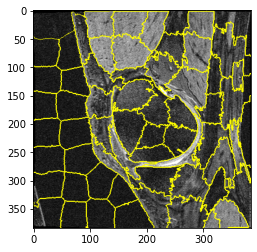

In [31]:
from pysnic.algorithms.snic import snic
from pkg_resources import resource_stream
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
from skimage.segmentation import mark_boundaries
from pysnic.algorithms.snic import snic


# load image
#color_image = np.array(Image.open(resource_stream(__name__, "../test_data/orchid.jpg")))
# color_image = np.array(Image.open('/playpen-raid/qinliu/data/OAI/demo/oai_knee_case1.png'))
color_image = np.array(Image.open('/playpen-raid2/qinliu/data/OAI/train/image/9435335_40.png'))

# if color_image.size != 3:
#     color_image = np.stack([color_image, color_image, color_image], axis=2)

lab_image = skimage.color.rgb2lab(color_image)
print(lab_image.dtype)
lab_image = lab_image.tolist()
number_of_pixels = color_image.shape[0] * color_image.shape[1]

# SNIC parameters
target_number_of_segments = 50
compactness = 10.00


segmentation, _, centroids = snic(
    lab_image, target_number_of_segments, compactness,
    update_func=lambda num_pixels: print("processed %05.2f%%" % (num_pixels * 100 / number_of_pixels)))
actual_number_of_segments = len(centroids)

# show the output of SNIC
fig = plt.figure("SNIC with %d segments" % actual_number_of_segments)
plt.imshow(mark_boundaries(color_image, np.array(segmentation)))
plt.show()